In [8]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt
import numpy as np

In [9]:
x_inputt = randn(100 * 16)
print(np.shape(x_inputt))
print(x_inputt)

(1600,)
[-1.18592938  1.56504807 -0.45229729 ...  0.49951391  0.30781224
 -0.71263302]


In [10]:
# generate points in latent space as input for the generator

def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)   #n_sample no. of latent noise vectors of size latent_dim (e.g 100)
    return x_input

In [11]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):   #square grid dimensions, examples: generated images
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()

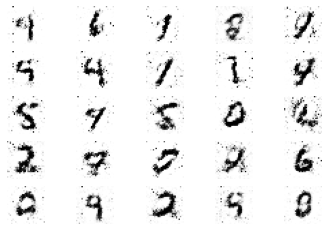

In [16]:
# load model

model = load_model('generator_model.h5')

img_num = 5
# generate images
#Generate 16 images, each image provides a vector of size 100 as input

latent_points = generate_latent_points(100, img_num * img_num) 

# generate images
X = model.predict(latent_points)

# plot the result
save_plot(X, img_num)  #Plot 4x4 grid (Change to 5 if generating 25 images)

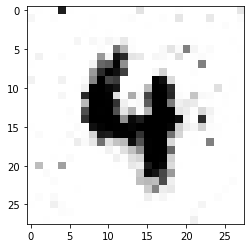

In [55]:
#To create same image, supply same vector each time
# all 0s
#vector = asarray([[0. for _ in range(100)]])  #Vector of all zeros

#To create random images each time...
vector = randn(100) #Vector of random numbers (creates a column, need to reshape)
vector = vector.reshape(1, 100)

# generate image
X = model.predict(vector)

# plot the result
plt.imshow(X[0, :, :, 0], cmap='gray_r')
plt.show()